# D200s Computer Vision: Technological Classification of Disaster Type and Damage Severity
### Francine Bianca Oca, Dylan Do, and Kassady Marasigan

### Imports needed for project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import pandas as pd
from skimage.feature import hog
from skimage.color import rgb2gray
import warnings
warnings.filterwarnings('ignore')
from data_utils import *
from feature_utils import *

### Load data images

In [2]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = config['data_dir']

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


# Exploratory Data Analysis (EDA)

### Visualize three images and their labels from each dataset

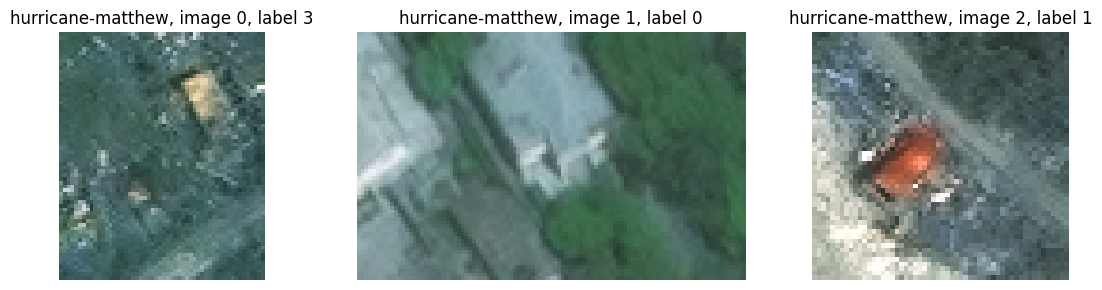

In [3]:
# Hurricane Matthew
disaster = disaster_list[0]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# Setup for multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Loop through the first three images
for i in range(3):
    img = images[i]
    label = labels[i]

    axes[i].imshow(img.astype(np.uint8))
    axes[i].set_title(f"{disaster}, image {i}, label {label}")
    axes[i].axis("off")

# Display images
plt.tight_layout()
plt.show()

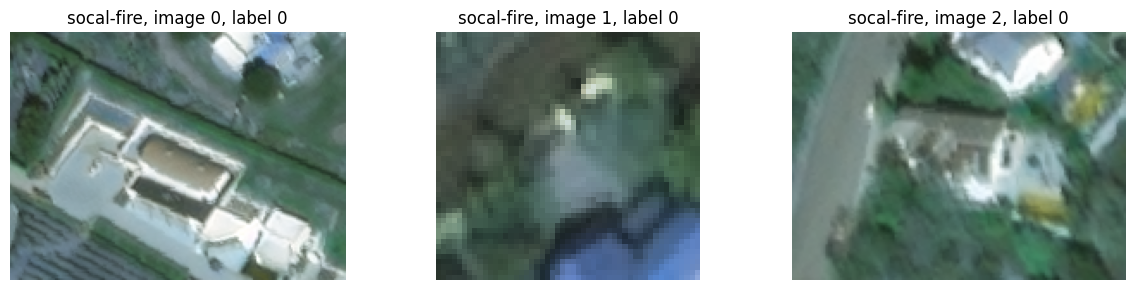

In [4]:
# Socal Fire
disaster = disaster_list[1]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# Setup for multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Loop through the first three images
for i in range(3):
    img = images[i]
    label = labels[i]

    axes[i].imshow(img.astype(np.uint8))
    axes[i].set_title(f"{disaster}, image {i}, label {label}")
    axes[i].axis("off")

# Display images
plt.tight_layout()
plt.show()

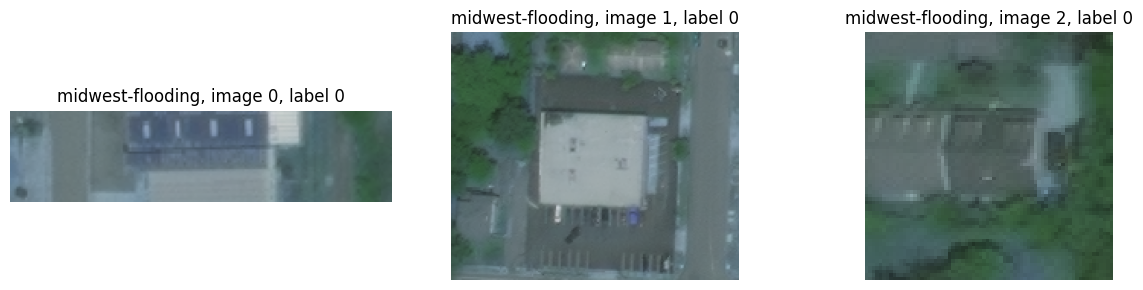

In [5]:
# Midwest Flooding
disaster = disaster_list[2]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# Setup for multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Loop through the first three images
for i in range(3):
    img = images[i]
    label = labels[i]

    axes[i].imshow(img.astype(np.uint8))
    axes[i].set_title(f"{disaster}, image {i}, label {label}")
    axes[i].axis("off")

# Display images
plt.tight_layout()
plt.show()

### Plot distribution of damage labels using imported function

<Figure size 1000x500 with 0 Axes>

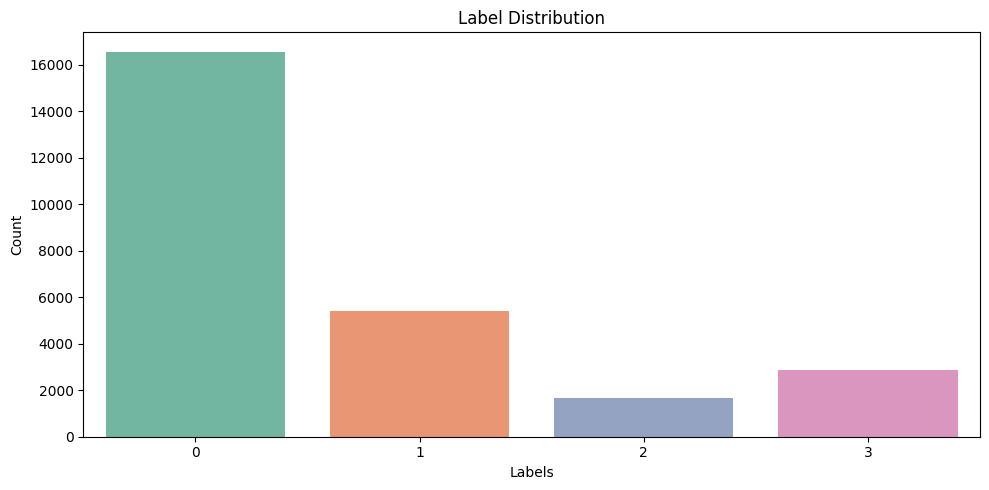

In [6]:
plt.figure(figsize=(10, 5))
plot_label_distribution(np.concatenate([data[disaster]['labels'] for disaster in disaster_list]))

### Plot the distribution of damage labels for each disaster

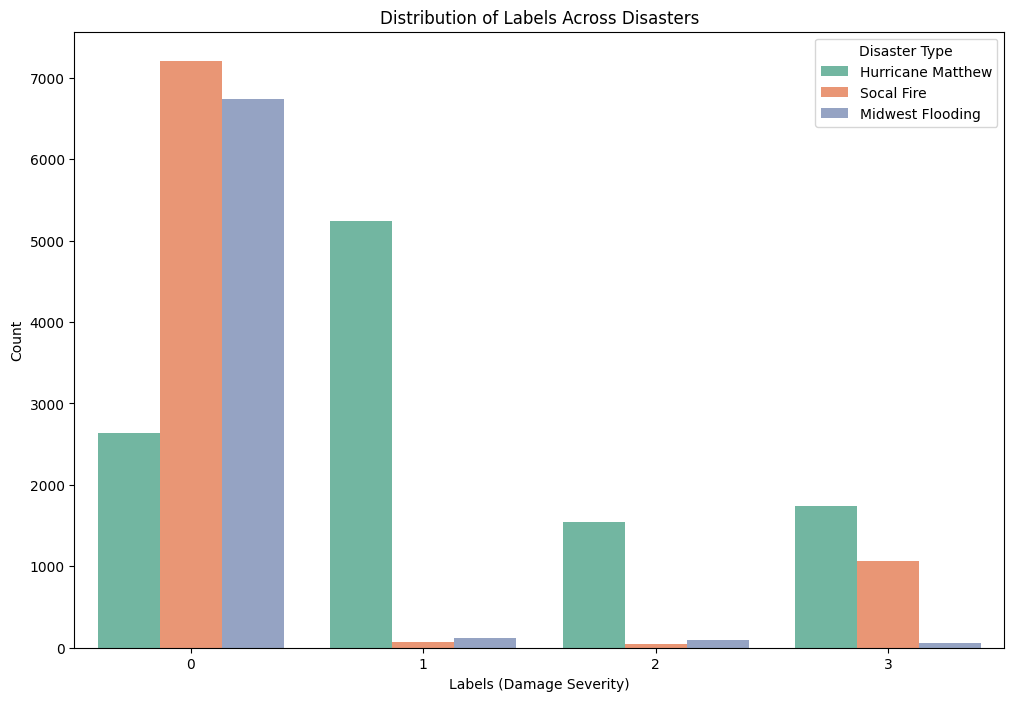

In [7]:
# Load images and labels for each disaster
train_images1 = load_images('../data/hurricane-matthew/train_images.npz')
train_labels1 = load_labels('../data/hurricane-matthew/train_labels.npy')
train_images2 = load_images('../data/socal-fire/train_images.npz')
train_labels2 = load_labels('../data/socal-fire/train_labels.npy')
train_images3 = load_images('../data/midwest-flooding/train_images.npz')
train_labels3 = load_labels('../data/midwest-flooding/train_labels.npy')

# Create a DataFrame for each set of labels
df1 = pd.DataFrame({'Label': train_labels1, 'Disaster': 'Hurricane Matthew'})
df2 = pd.DataFrame({'Label': train_labels2, 'Disaster': 'Socal Fire'})
df3 = pd.DataFrame({'Label': train_labels3, 'Disaster': 'Midwest Flooding'})

# Concatenate all dataframes
all_labels = pd.concat([df1, df2, df3])

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=all_labels, x='Label', hue='Disaster', palette='Set2')
plt.title("Distribution of Labels Across Disasters")
plt.xlabel("Labels (Damage Severity)")
plt.ylabel("Count")
plt.legend(title='Disaster Type')

# Save plot to figures directory
plt.savefig(f'../figures/distribution_of_labels_across_disasters.png')
plt.show()

### Plot number of images per disaster type

In [8]:
for disaster in disaster_list:
    print(f"Number of images in {disaster} dataset: {len(data[disaster]['images'])}")

Number of images in hurricane-matthew dataset: 11151
Number of images in socal-fire dataset: 8380
Number of images in midwest-flooding dataset: 7004


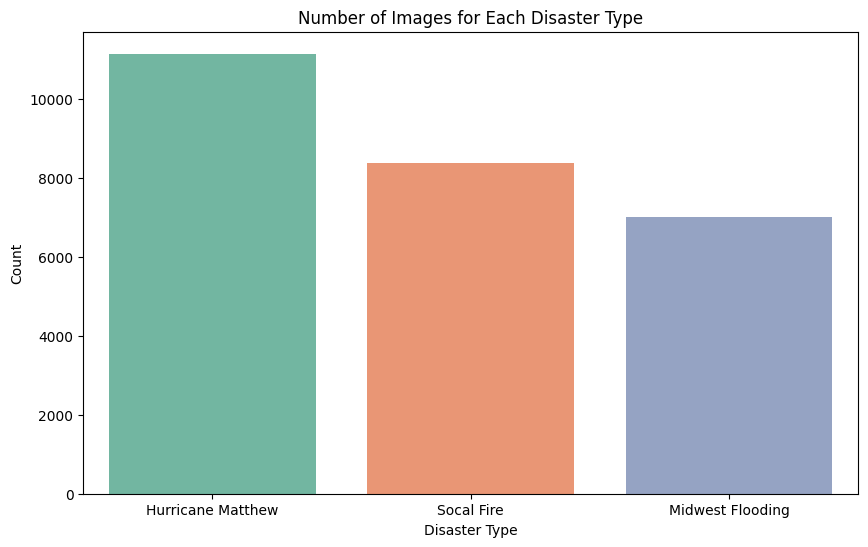

In [9]:
# Data setup
num_images_per_disaster = {"Hurricane Matthew": 11151, "Socal Fire": 8380, "Midwest Flooding": 7004}
disasters = list(num_images_per_disaster.keys())
num_images = list(num_images_per_disaster.values())

# Create dataframe
df = pd.DataFrame({'Disaster Type': disasters, 'Number of Images': num_images})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Disaster Type', y='Number of Images', data=df, palette='Set2')
plt.title('Number of Images for Each Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Count')

# Save plot to figures directory
plt.savefig(f'../figures/number_of_images_for_each_disaster_type.png')
plt.show()

### Plot distribution of image sizes

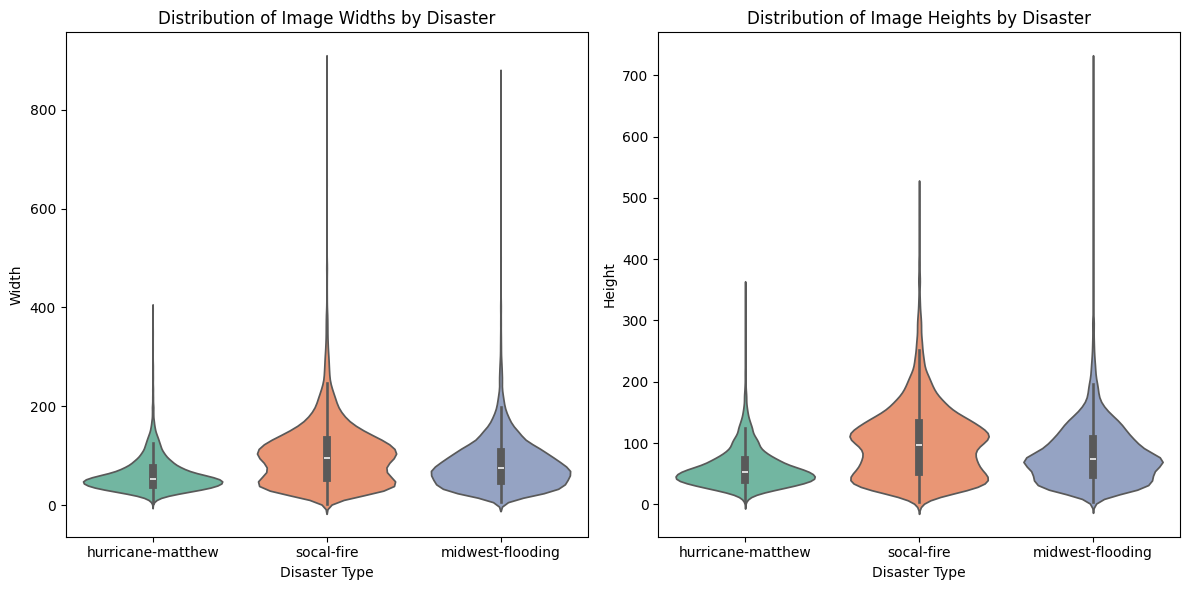

In [10]:
# Create image dimensions dictionary
image_dimensions = {'Disaster': [], 'Width': [], 'Height': []}

# Get dimensions of each image
for disaster in disaster_list:
    images = data[disaster]['images']
    for img in images:
        height, width = img.shape[:2]
        image_dimensions['Disaster'].append(disaster)
        image_dimensions['Width'].append(width)
        image_dimensions['Height'].append(height)

# Convert to DataFrame
dimensions_df = pd.DataFrame(image_dimensions)

# Plotting
plt.figure(figsize=(12, 6))

# Plot width distributions
plt.subplot(1, 2, 1)
sns.violinplot(x='Disaster', y='Width', data=dimensions_df, palette='Set2')
plt.title('Distribution of Image Widths by Disaster')
plt.ylabel('Width')
plt.xlabel('Disaster Type')

# Plot height distributions
plt.subplot(1, 2, 2)
sns.violinplot(x='Disaster', y='Height', data=dimensions_df, palette='Set2')
plt.title('Distribution of Image Heights by Disaster')
plt.ylabel('Height')
plt.xlabel('Disaster Type')
plt.tight_layout()

# Save plot to figures directory
plt.savefig(f'../figures/distribution_of_image_widths_and_heights.png')
plt.show()

### Plot color information useful for disaster type classification

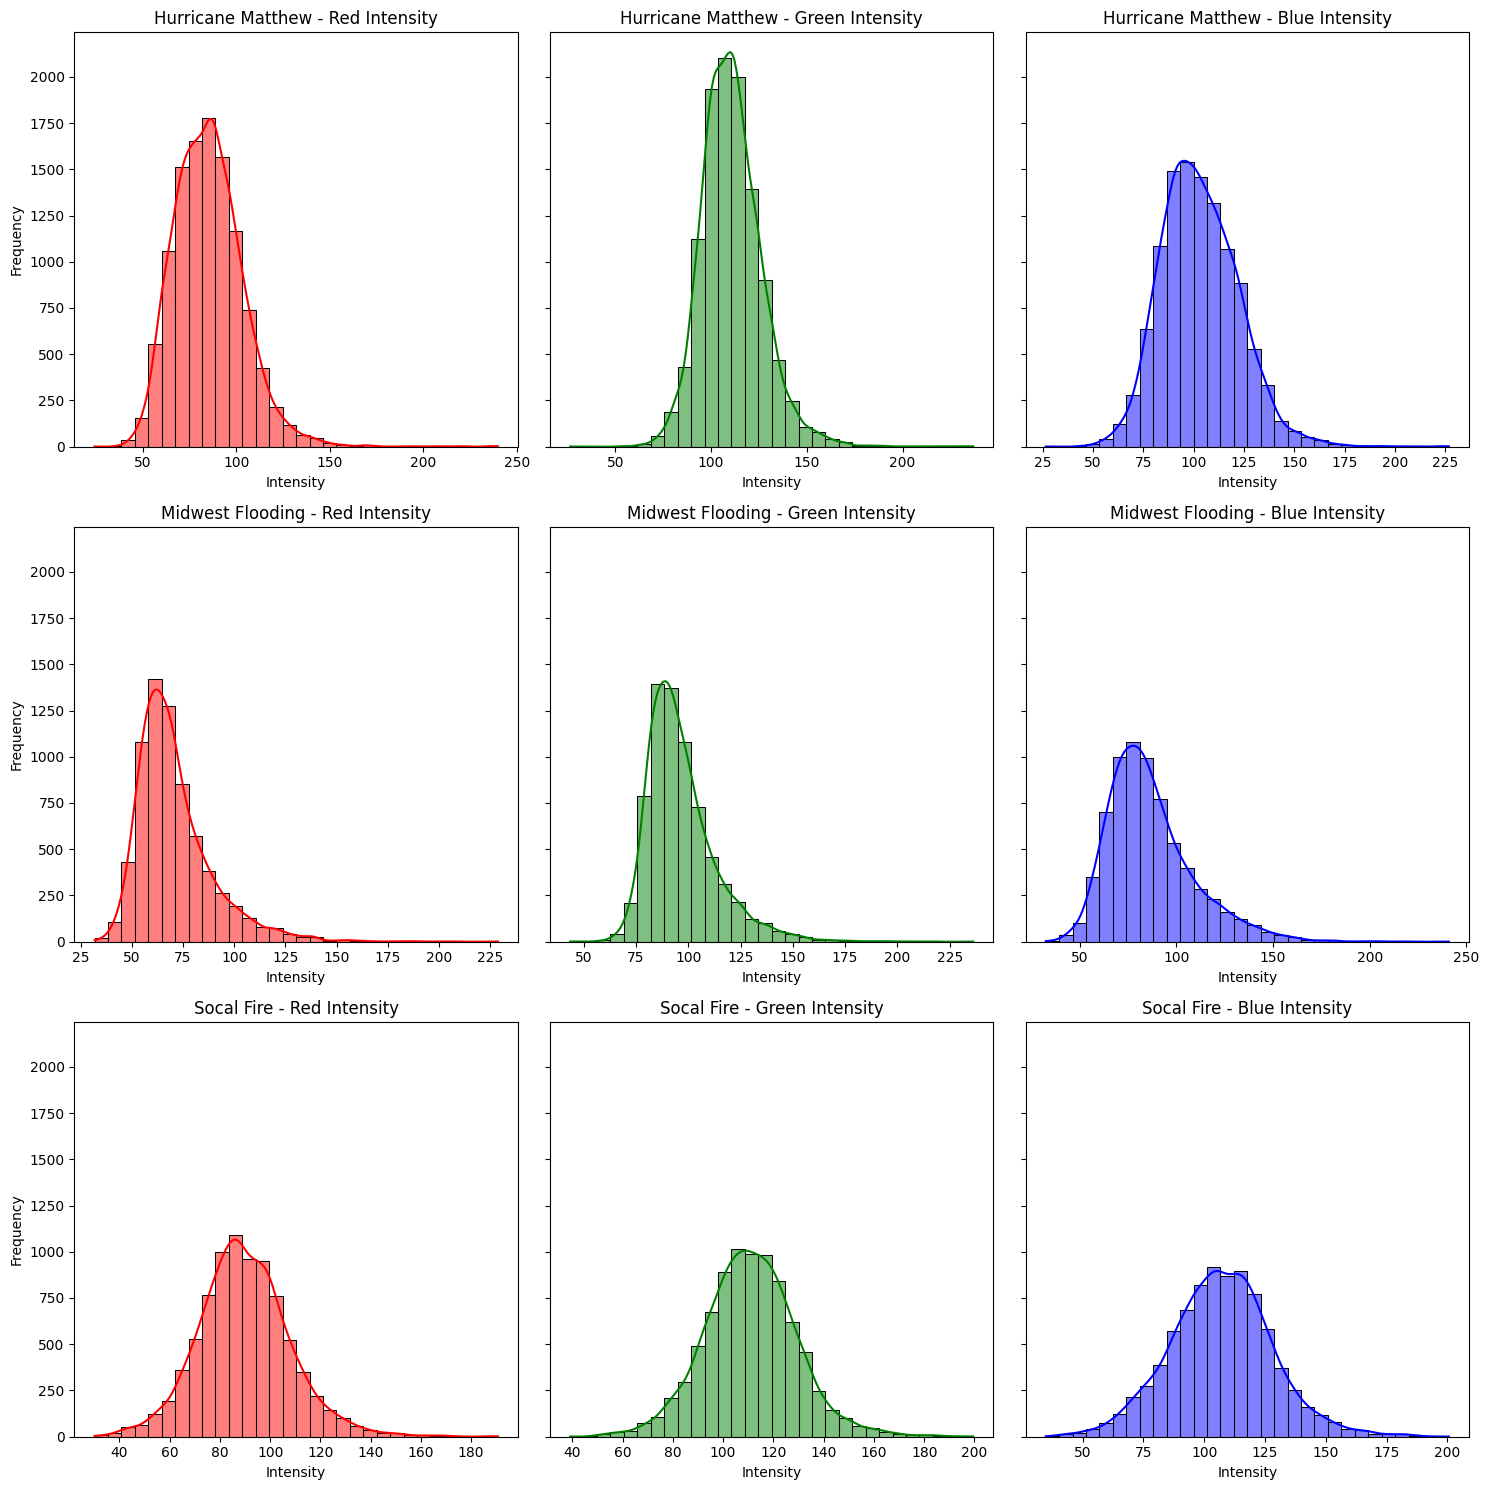

In [11]:
# Plot distribution of RGB color intensities for each disaster
disasters = ['hurricane-matthew', 'midwest-flooding', 'socal-fire']
colors = ['red', 'green', 'blue']

# Adjusting the subplot layout to fit three disasters
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharey=True)

for i, disaster in enumerate(disasters):
    images = data[disaster]['images']
    for idx, color in enumerate(colors):
        # Calculate average color intensity
        color_data = [np.mean(img[:, :, idx]) for img in images]
        sns.histplot(color_data, bins=30, ax=axes[i, idx], color=color, kde=True)
        axes[i, idx].set_title(f'{disaster.replace("-", " ").title()} - {color.capitalize()} Intensity')
        axes[i, idx].set_xlabel('Intensity')
        axes[i, idx].set_ylabel('Frequency')
plt.tight_layout()

# Save plot to figures directory
plt.savefig(f'../figures/RGB_intensities.png')
plt.show()

### Check for missing or invalid data

In [12]:
# Check for missing entries
expected_num_images = sum(len(data[disaster]['images']) for disaster in disaster_list)
actual_num_images = sum(len(data[disaster]['images']) for disaster in data)
if expected_num_images != actual_num_images:
    print(f"Expected number of images: {expected_num_images}, Actual number of images: {actual_num_images}")
else:
    print("No missing entries found for images!")

expected_num_labels = sum(len(data[disaster]['labels']) for disaster in disaster_list)
actual_num_labels = sum(len(data[disaster]['labels']) for disaster in data)
if expected_num_labels != actual_num_labels:
    print(f"Expected number of labels: {expected_num_labels}, Actual number of labels: {actual_num_labels}")
else:
    print("No missing entries found for labels!")

# Check for invalid entries
# Iterate through images and check their dimensions or verify label ranges
invalid_images = []
for disaster in disaster_list:
    for i, img in enumerate(data[disaster]['images']):
        # Check if the image is valid (e.g., non-empty and has expected dimensions)
        if img.size == 0:
            invalid_images.append((disaster, i))
if invalid_images:
    print("Invalid images found:")
    for disaster, idx in invalid_images:
        print(f"Disaster: {disaster}, Index: {idx}")
else:
    print("No invalid entries found!")

No missing entries found for images!
No missing entries found for labels!
No invalid entries found!


# Feature Engineering

### Feature 1: Sobel Edge Detection

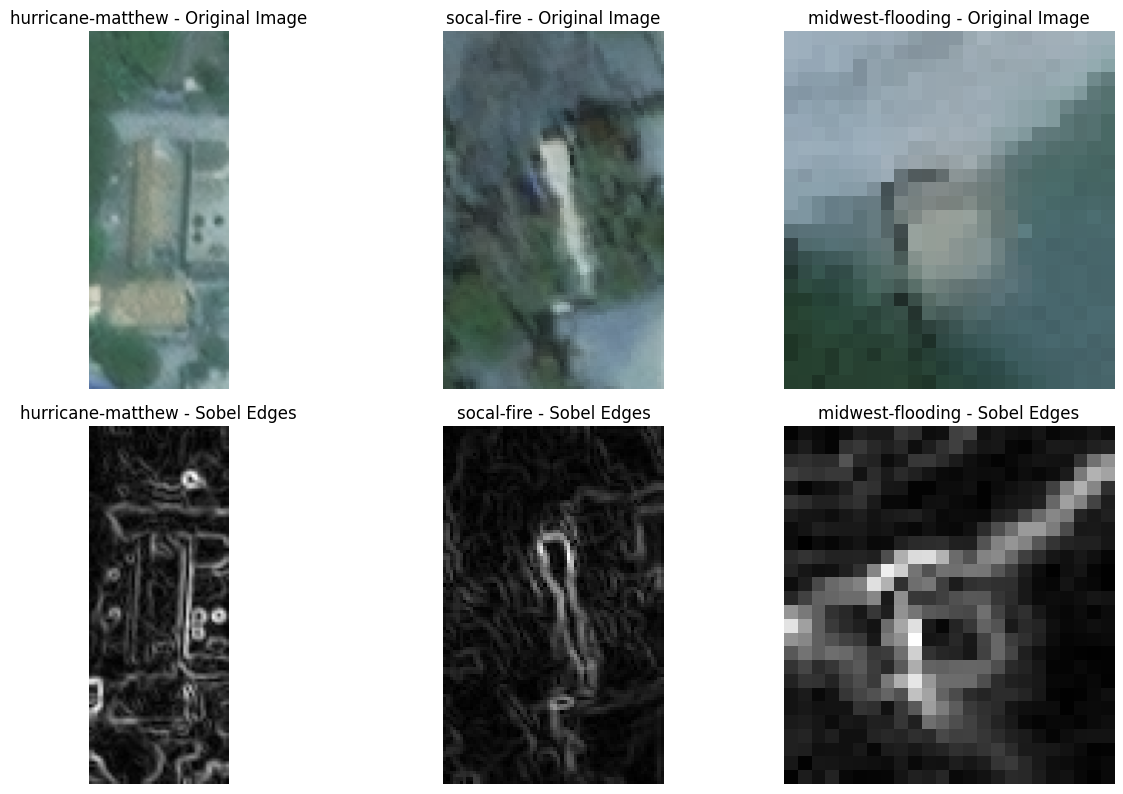

In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Plot sobel edge filter
plt.figure(figsize=(12, 12))
for i, disaster in enumerate(disaster_list):
    idx = np.random.randint(len(data[disaster]['images']))  # Randomly select an image index from data
    img = data[disaster]['images'][idx]  # Access image from data
    sobel_edges_original = get_sobel_features(img)
    
    # Display original image
    plt.subplot(3, len(disaster_list), i+1)
    plt.imshow(img)
    plt.title(f"{disaster} - Original Image")
    plt.axis("off")
    
    # Display sobel edge image
    plt.subplot(3, len(disaster_list), i+1+len(disaster_list))
    plt.imshow(sobel_edges_original, cmap='gray')
    plt.title(f"{disaster} - Sobel Edges")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

### Feature 2: Local Binary Patterns (LBP)

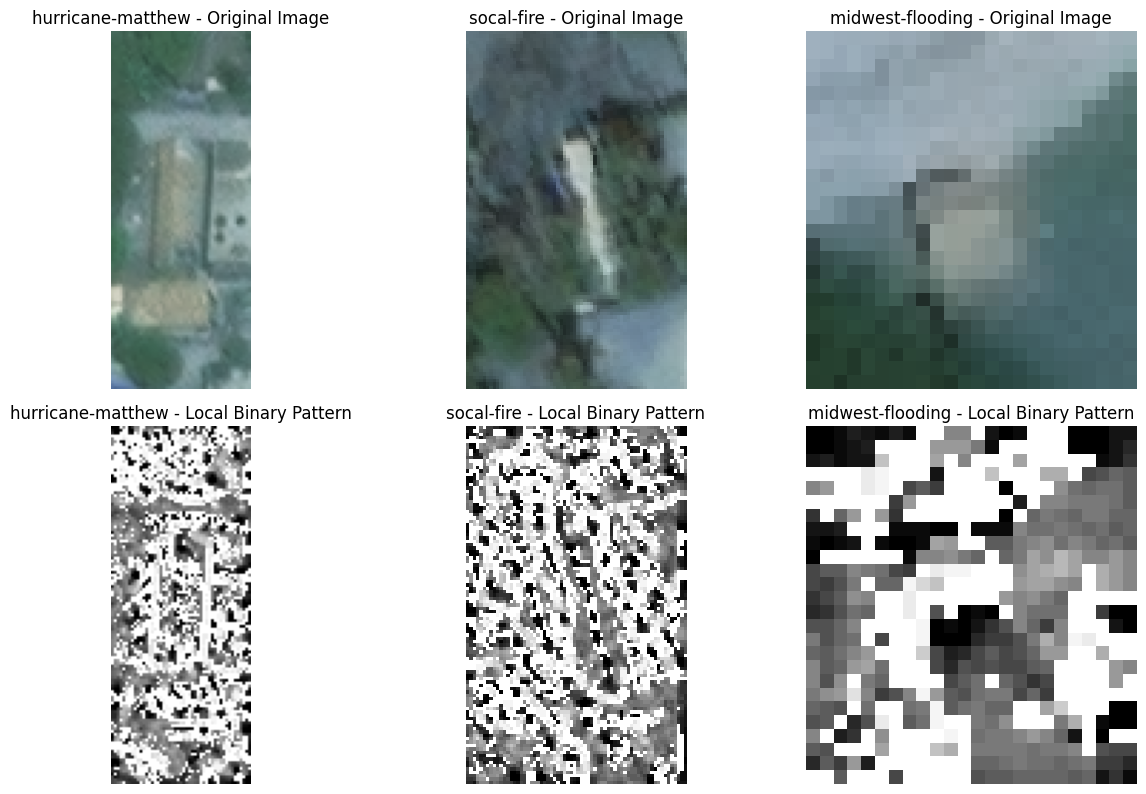

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Plot LBP
plt.figure(figsize=(12, 12))
for i, disaster in enumerate(disaster_list):
    idx = np.random.randint(len(data[disaster]['images']))  # Randomly select an image index from data
    img = data[disaster]['images'][idx]  # Access image from data
    lbp_image = get_local_binary_pattern(img, radius=3)
    
    # Display original image
    plt.subplot(3, len(disaster_list), i+1)
    plt.imshow(img)
    plt.title(f"{disaster} - Original Image")
    plt.axis("off")
    
    # Display LBP image
    plt.subplot(3, len(disaster_list), i+1+len(disaster_list))
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f"{disaster} - Local Binary Pattern")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

### Feature 3: Gabor Features

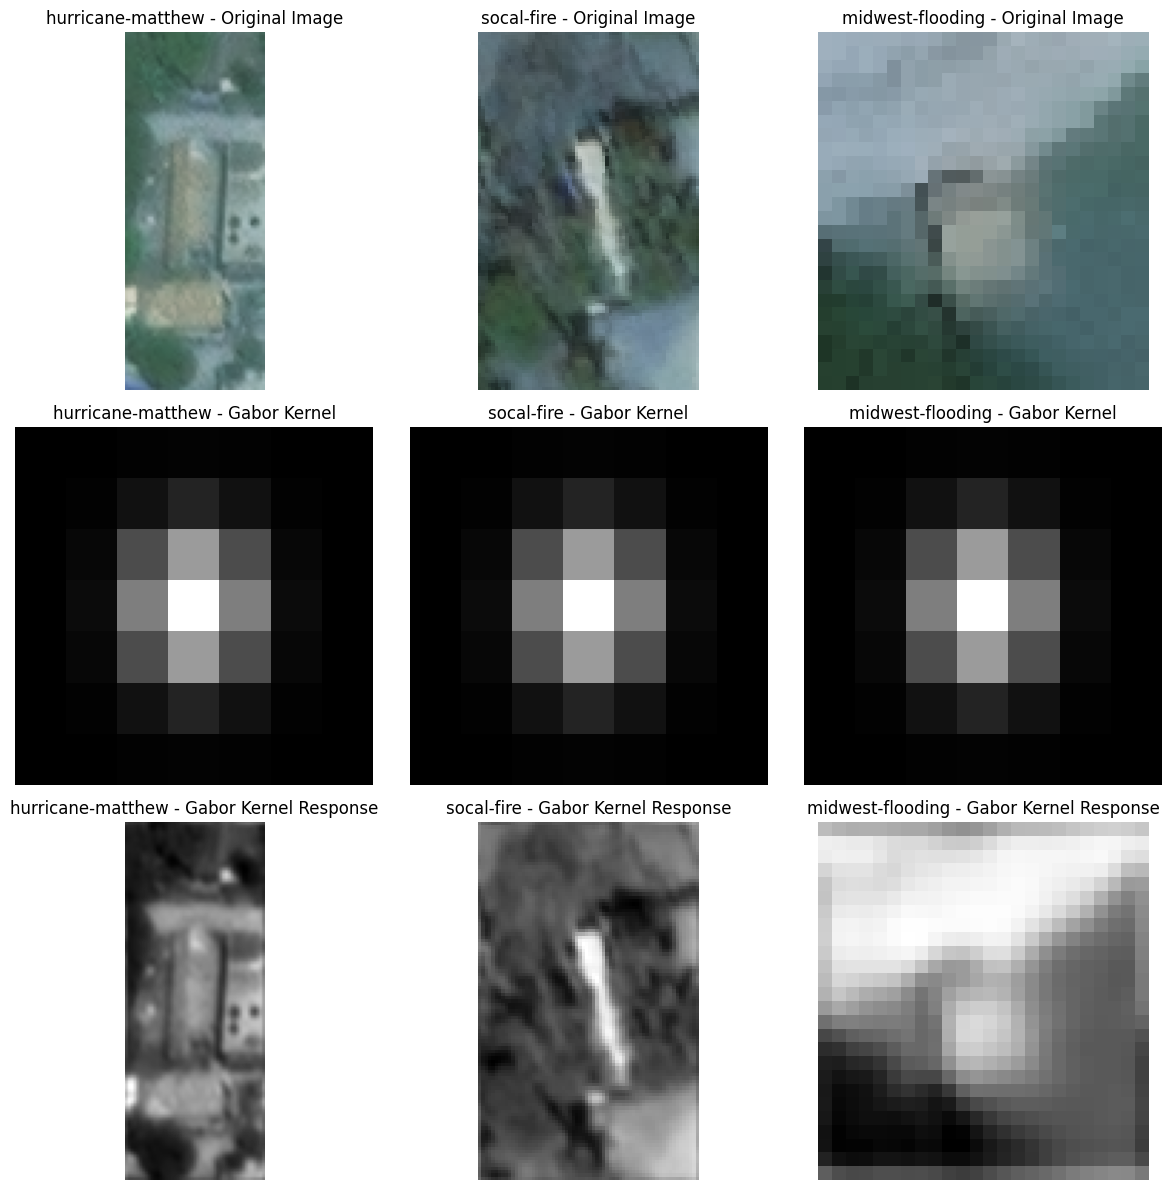

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

# Plot gabor kernel
plt.figure(figsize=(12, 12))
for i, disaster in enumerate(disaster_list):
    idx = np.random.randint(len(data[disaster]['images']))  # Randomly select an image index from data
    img = data[disaster]['images'][idx]  # Access image from data
    
    # Gabor filters
    theta = 0
    sigma = 1.0
    frequency = 0.1

    kernel = generate_gabor_kernel(theta, sigma, frequency)
    gabor_features = get_gabor_features(img, kernel)
    
    # Display original image
    plt.subplot(3, len(disaster_list), i+1)
    plt.imshow(img)
    plt.title(f"{disaster} - Original Image")
    plt.axis("off")
    
    # Display gabor kernel image
    plt.subplot(3, len(disaster_list), i+1+len(disaster_list))
    plt.imshow(kernel, cmap='gray')
    plt.title(f"{disaster} - Gabor Kernel")
    plt.axis("off")
    
    # Display gabor kernel response image
    plt.subplot(3, len(disaster_list), i+1+len(disaster_list)*2)
    plt.imshow(gabor_features, cmap='gray')
    plt.title(f"{disaster} - Gabor Kernel Response")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

### Feature 4: Color Information

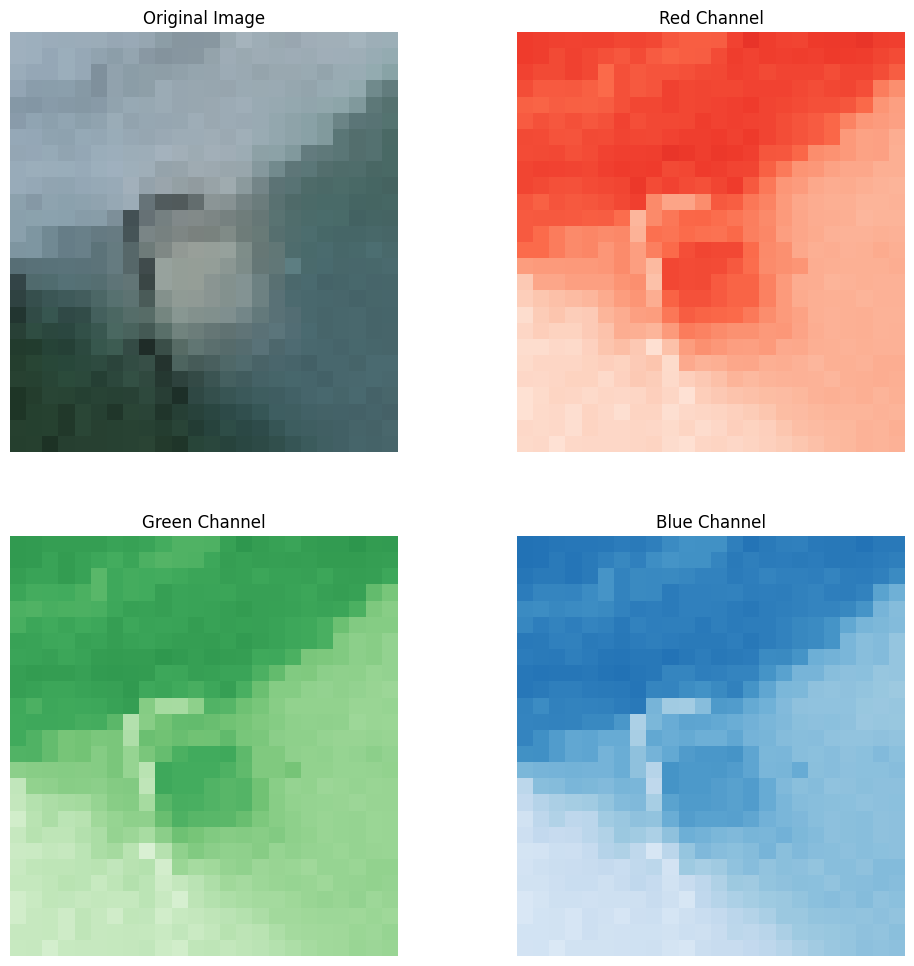

In [16]:
# Hurricane Matthew example
plt.figure(figsize=(12, 12))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# Display red color channel image
plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

# Display green color channel image
plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

# Display blue color channel image
plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

### Feature 5: Image Width and Height

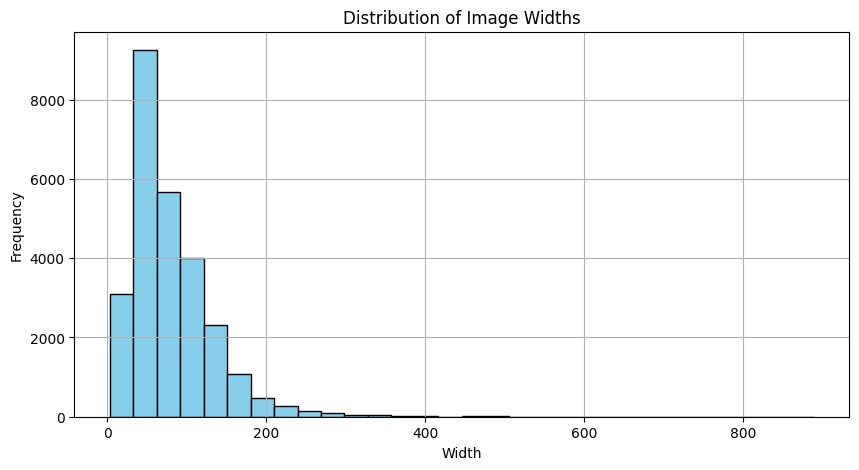

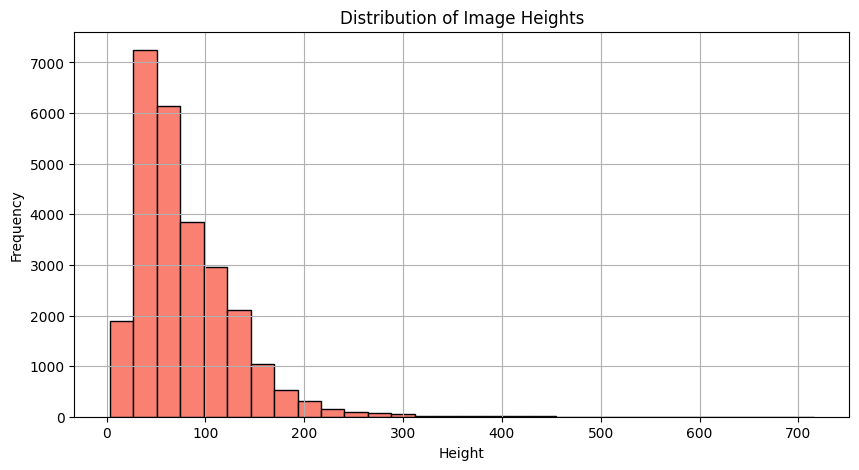

In [17]:
# Calculate image dimensions
image_widths = []
image_heights = []

for disaster in disaster_list:
    for img in data[disaster]['images']:
        # Get dimensions of each image
        height, width, _ = img.shape
        image_widths.append(width)
        image_heights.append(height)

# Plot the distribution of image widths
plt.figure(figsize=(10, 5))
plt.hist(image_widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of image heights
plt.figure(figsize=(10, 5))
plt.hist(image_heights, bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Feature 6: Pixel Proportions

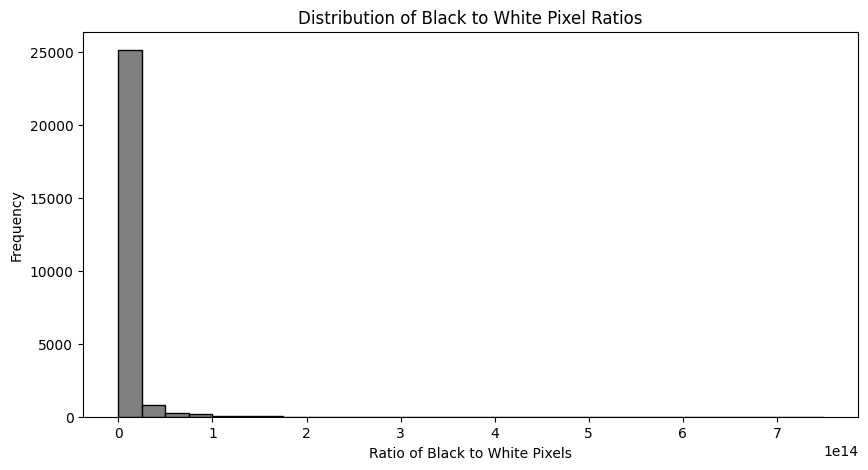

In [18]:
# Feature to calculate ratio of black to white pixels in an image
def calculate_black_white_ratio(image, low_thresh=50, high_thresh=205):
    black_pixels = np.sum(image < low_thresh)
    white_pixels = np.sum(image > high_thresh)
    ratio = black_pixels / (white_pixels + 1e-10)  # Adding a small number to avoid division by zero
    return ratio

# Calculate the ratios
ratios = []
for disaster in disaster_list:
    images = data[disaster]['images']
    for img in images:
        ratio = calculate_black_white_ratio(img)
        ratios.append(ratio)

# Plot the ratios
plt.figure(figsize=(10, 5))
plt.hist(ratios, bins=30, color='grey', edgecolor='black')
plt.title('Distribution of Black to White Pixel Ratios')
plt.xlabel('Ratio of Black to White Pixels')
plt.ylabel('Frequency')
plt.show()

### Feature 7: Histogram of Oriented Gradients (HOG)

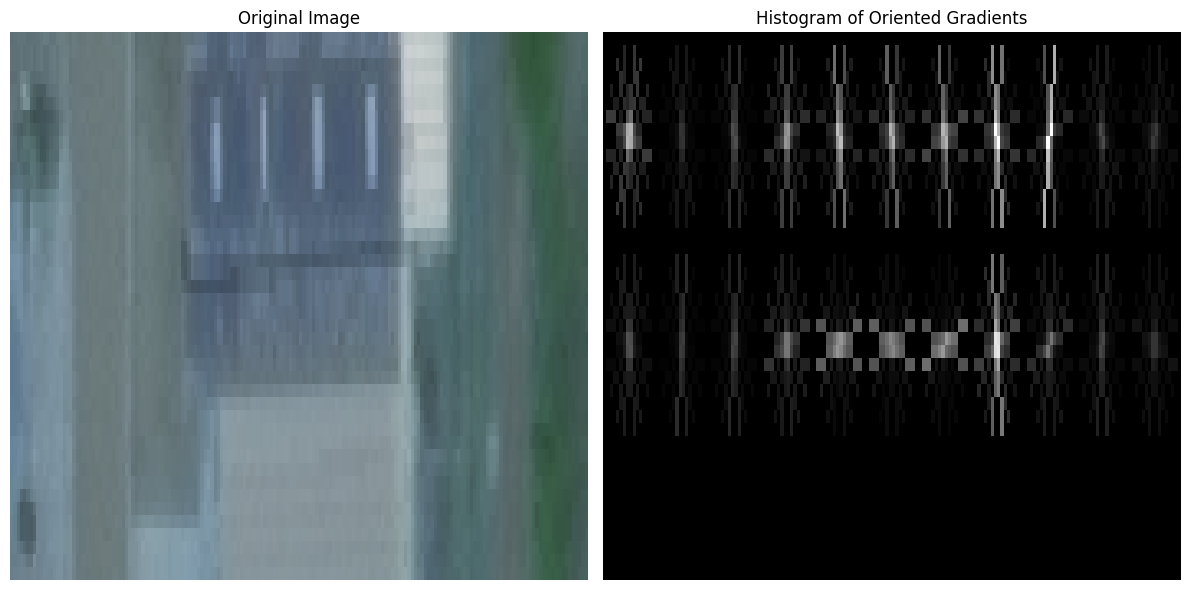

60.1077388707667

In [19]:
def extract_hog_features(image, visualize=False):
    """Feature function to calculate histogram of oriented gradients (HOG)."""
    original_image = image.copy() # Store original image for visualization

    # Convert image grayscale
    if image.ndim == 3 and image.shape[-1] == 3:
        image = rgb2gray(image)

    # Extract Histogram of Oriented Gradients (HOG) from the grayscale image
    # 'fd': feature descriptor, 'hog_image': the visualization of the HOG features.
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, feature_vector=True)

    if visualize:
        # Plot the original and HOG image
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

        ax1.axis('off')
        # Display the original image
        if original_image.ndim == 3 and original_image.shape[-1] == 3:
            ax1.imshow(original_image, aspect='auto')
        else:
            ax1.imshow(original_image, cmap=plt.cm.gray, aspect='auto')
        ax1.set_title('Original Image')

        ax2.axis('off')
        ax2.imshow(hog_image, cmap=plt.cm.gray, aspect='auto') # Display the HOG image.
        ax2.set_title('Histogram of Oriented Gradients')
        plt.tight_layout()
        plt.show()

    return fd.sum()  # return the sum of the HOG feature descriptors

# Example image
sample_image = images[0]
# Visualize HOG features of the image
extract_hog_features(sample_image, visualize=True)

### Feature 8: Contour Finding

In [20]:
from skimage import measure, color

def extract_contour_features(image):
    """Extract the count of contours from an image."""
    # Convert to grayscale
    if image.ndim == 3:
        image = color.rgb2gray(image)
    
    # Find contours at a constant intensity value
    contours = measure.find_contours(image, 0.5)
    
    # Return the number of contours found
    num_contours = len(contours)
    return num_contours

    
# Example image
sample_image = images[3]
features = extract_contour_features(sample_image)
print(features)

19


### Feature 9: Segementation Count

In [21]:
from skimage.segmentation import slic
def extract_segmentation_count(image):
    """Extract the count of unique segments from an image."""
    # Apply segmentation
    segments = slic(image, n_segments=250, compactness=10, sigma=1, start_label=1)
    
    # Count unique segments
    num_segments = len(np.unique(segments))
    
    return num_segments

# Example instnace
sample_image = images[0]
num_blobs = extract_segmentation_count(sample_image)
print("Number of segments detected:", num_blobs)

Number of segments detected: 273


### Feature 10: Euler Number

In [22]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import euler_number as calculate_euler
from skimage import img_as_ubyte

# Euler number: number of objects minus the number of holes. 
def extract_euler_number(image):
    if image.ndim == 3:
        image = rgb2gray(image)  # Convert to grayscale
    
    # Normalize or scale image to be within [0, 1] if necessary
    if image.min() < 0 or image.max() > 1:
        image = (image - image.min()) / (image.max() - image.min())
    
    # Convert to 8-bit byte format
    image_ubyte = img_as_ubyte(image)

    # Compute threshold and apply to binarize the image
    thresh = threshold_otsu(image_ubyte)
    binary_image = image_ubyte > thresh

    # Calculate Euler number
    euler_num = calculate_euler(binary_image, connectivity=1)
    return euler_num

# Example use case
sample_image = images[0]
euler_feature = extract_euler_number(sample_image)
print("Euler number of the image:", euler_feature)

Euler number of the image: 11


# Data Structuring

In [23]:
# Store all features in a pandas dataframe
results = []
for disaster in disaster_list:
    print(f"Loading train images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split="train")
    labels = get_labels(data_dir, disaster, split="train")

    for img, label in zip(images, labels):
        # Convert image dtype for processing
        img = convert_dtype([img], dtype=np.float32)[0]

        # Extract Sobel features
        sobel_features = get_sobel_features(img)
        sobel_mean = np.mean(sobel_features)

        # Extract LBP features
        lbp_features = get_local_binary_pattern(img)
        lbp_mean = np.mean(lbp_features)

        # Extract Gabor features
        theta, sigma, frequency = 0, 1.0, 0.1
        kernel = generate_gabor_kernel(theta, sigma, frequency)
        gabor_features = get_gabor_features(img, kernel)
        gabor_mean = np.mean(gabor_features)

        # Calculate mean color intensities for each channel
        red_mean = np.mean(img[:, :, 0])
        green_mean = np.mean(img[:, :, 1])
        blue_mean = np.mean(img[:, :, 2])

        # Calculate image dimensions
        height, width = img.shape[:2]

        # Calculate pixel proportions
        pixel_props = calculate_black_white_ratio(img)

        # Extract HOG Features
        hog_features = extract_hog_features(img, visualize=False)

        # Contour Feature
        num_contours = extract_contour_features(img)

        # Segment Detection Feature
        segment_count = extract_segmentation_count(img)

        # Euler Number
        euler_number = extract_euler_number(img)

        # Append to results list
        results.append({
            'disaster_type': disaster,
            'sobel_features': sobel_features,
            'sobel_mean': sobel_mean,
            'lbp_features': lbp_features.flatten(),
            'lbp_mean': lbp_mean,
            'gabor_features': gabor_features.flatten(),
            'gabor_mean': gabor_mean,
            'red_mean': red_mean,
            'green_mean': green_mean,
            'blue_mean': blue_mean,
            'width': width,
            'height': height,
            'pixel_props': pixel_props,
            'hog_features': hog_features,
            'num_contours': num_contours,
            'segment_count': segment_count,
            'euler_number': euler_number,
            'label': label
        })

# Display dataframe of features
features_df = pd.DataFrame(results)
features_df

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


,disaster_type,sobel_features,sobel_mean,lbp_features,lbp_mean,gabor_features,gabor_mean,red_mean,green_mean,blue_mean,width,height,pixel_props,hog_features,num_contours,segment_count,euler_number,label
0,hurricane-matthew,"[[8.780424, 4.093462, 2.5983806, 4.4233723, 4....",14.569633,"[3.0, 4.0, 1.0, 9.0, 0.0, 1.0, 5.0, 2.0, 2.0, ...",4.931624,"[69.64084, 70.26716, 70.39187, 70.20955, 70.06...",81.010612,75.702278,105.275780,101.084045,54,65,4.345455e+00,33.897690,0,222,89,3
1,hurricane-matthew,"[[6.0609307, 6.4567037, 5.8585186, 9.833767, 2...",9.584824,"[2.0, 5.0, 4.0, 2.0, 3.0, 3.0, 9.0, 2.0, 3.0, ...",4.702630,"[117.57879, 134.14302, 136.76431, 135.9622, 12...",92.084763,88.451599,119.422882,110.248329,105,67,1.535354e+00,66.172371,0,271,7,0
2,hurricane-matthew,"[[7.8057847, 11.089824, 12.990839, 20.428656, ...",17.071079,"[2.0, 4.0, 5.0, 4.0, 0.0, 9.0, 3.0, 2.0, 9.0, ...",4.952381,"[81.89116, 86.76233, 87.61375, 91.107445, 96.1...",98.315758,111.971558,122.160713,119.043320,56,54,1.592466e-01,25.344090,0,342,52,1
3,hurricane-matthew,"[[36.96584, 57.97566, 31.068295, 13.523826, 5....",6.611919,"[0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 1.0, ...",4.878325,"[117.33957, 114.29235, 99.00635, 90.05382, 86....",99.939568,96.979698,128.503967,127.725380,124,114,6.052270e-02,134.007019,0,216,15,0
4,hurricane-matthew,"[[23.126709, 16.672747, 8.978999, 7.197319, 14...",16.538330,"[1.0, 0.0, 1.0, 1.0, 1.0, 3.0, 5.0, 4.0, 0.0, ...",4.397566,"[83.53239, 93.17831, 95.12369, 95.15754, 94.45...",84.787422,87.179848,108.778908,96.311356,51,58,3.825000e+00,24.869530,0,319,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,midwest-flooding,"[[4.236639, 5.4919558, 3.192528, 1.2639577, 1....",6.256011,"[3.0, 3.0, 3.0, 1.0, 5.0, 4.0, 5.0, 9.0, 1.0, ...",5.122473,"[87.14094, 75.39874, 76.005264, 76.82237, 76.3...",90.895973,90.083237,117.024971,109.146255,29,29,2.000000e+10,2.809972,0,225,2,0
26531,midwest-flooding,"[[0.32943636, 1.6661634, 37.45385, 40.965668, ...",8.461016,"[1.0, 4.0, 5.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, ...",4.987358,"[88.60853, 82.762566, 88.2788, 103.22404, 112....",97.525253,95.705307,125.348289,122.000000,39,144,3.907143e+01,47.591141,0,231,0,0
26532,midwest-flooding,"[[1.107697, 4.067815, 3.1309383, 2.1393306, 7....",6.247892,"[3.0, 4.0, 0.0, 9.0, 1.0, 0.0, 1.0, 1.0, 9.0, ...",4.923510,"[68.92535, 61.607853, 62.01586, 62.33963, 62.7...",68.860588,64.786156,90.175323,77.797966,64,86,1.434000e+13,55.599369,0,220,7,0
26533,midwest-flooding,"[[2.4217374, 1.8547465, 1.1825682, 3.815029, 3...",5.501845,"[1.0, 9.0, 9.0, 1.0, 9.0, 1.0, 9.0, 9.0, 1.0, ...",5.011884,"[58.26086, 58.272247, 58.111443, 57.27698, 55....",56.501053,47.415947,76.151108,59.315269,140,116,1.390571e+03,157.498413,0,237,13,0


# Task A: Disaster Type Classification

TASK A: DISASTER TYPE CLASSIFICATION
The agency consists of different subdivisions for assisting with different disaster types, e.g., fires, floods, etc. In the event of a disaster, the agency mounts its response effort by first assessing the type of disaster and then requesting the appropriate subdivision to assist with the disaster.

Your task is to assist the agency with making this initial call quickly by automatically classifying images based on the disaster scenario. Specifically, your role will be to build a classifier that can distinguish images from the midwest-flooding disaster and the socal-fire disaster.

To assess your performance, please submit predictions for the test_images_flooding-fire.npz images. This should be in a csv file test_images_flooding-fire_predictions.csv consisting of a single column with no header, with a 0 to indicate a midwest-flooding prediction and a 1 to indicate a socal-fire prediction. The prediction in row i should correspond to the ith image.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Prep the data

In [25]:
# Filter the DataFrame for the relevant disaster types and features
df_filtered = features_df[(features_df['disaster_type'] == 'midwest-flooding') | (features_df['disaster_type'] == 'socal-fire')]
features = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 
            'blue_mean', 'width', 'height', 'hog_features', 'num_contours', 
            'segment_count', 'euler_number']
X = df_filtered[features]
y = df_filtered['disaster_type'].apply(lambda x: 0 if x == 'midwest-flooding' else 1)  # Encode labels

### Normalize the features

In [26]:
# Normalize the feature vectors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into train/validation sets

In [27]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the model

In [28]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=13000, solver='sag') # sag optimizes the sum of a finite number of smooth convex functions
model.fit(X_train, y_train)

LogisticRegression(max_iter=13000, solver='sag')

### Evaluate the model

In [29]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model's accuracy on the validation set
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9642508937276568


### Run model on test images

In [30]:
# Load and extract features from the test images
test_data = np.load('../data/test_images_flooding-fire.npz')
test_images = [test_data[key] for key in test_data.keys()]  # get all images from the loaded data

# Initialize a list to store the test features
test_features = []

# Iterate over each test image and extract features
for img_array in test_images:
    # Convert image to float32 for processing
    img = img_array.astype(np.float32)

    # Feature extraction
    sobel_features = get_sobel_features(img)
    sobel_mean = np.mean(sobel_features)

    lbp_features = get_local_binary_pattern(img)
    lbp_mean = np.mean(lbp_features)

    theta, sigma, frequency = 0, 1.0, 0.1
    kernel = generate_gabor_kernel(theta, sigma, frequency)
    gabor_features = get_gabor_features(img, kernel)
    gabor_mean = np.mean(gabor_features)

    red_mean = np.mean(img[:, :, 0])
    green_mean = np.mean(img[:, :, 1])
    blue_mean = np.mean(img[:, :, 2])

    height, width = img.shape[:2]

    hog_features = extract_hog_features(img, visualize=False)

    num_contours = extract_contour_features(img)

    segment_count = extract_segmentation_count(img)
    
    euler_number = extract_euler_number(img)

    test_features.append({
        'sobel_features': sobel_features.flatten().tolist(),
        'sobel_mean': sobel_mean,
        'lbp_features': lbp_features.flatten().tolist(),
        'lbp_mean': lbp_mean,
        'gabor_features': gabor_features.flatten().tolist(),
        'gabor_mean': gabor_mean,
        'red_mean': red_mean,
        'green_mean': green_mean,
        'blue_mean': blue_mean,
        'width': width,
        'height': height,
        'hog_features': hog_features,
        'num_contours': num_contours,
        'segment_count': segment_count,
        'euler_number': euler_number
    })

# Convert the list of results to a DataFrame
test_features_df = pd.DataFrame(test_features)
test_features_df.head()

,sobel_features,sobel_mean,lbp_features,lbp_mean,gabor_features,gabor_mean,red_mean,green_mean,blue_mean,width,height,hog_features,num_contours,segment_count,euler_number
0,"[9.485313415527344, 8.908835411071777, 8.10679...",14.258375,"[3.0, 3.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...",4.710526,"[116.81983947753906, 121.16020202636719, 120.2...",111.157364,120.082458,139.956146,135.542099,30,19,2.749444,0,153,3
1,"[3.252689838409424, 8.485282897949219, 10.8453...",9.772590,"[9.0, 1.0, 1.0, 1.0, 0.0, 9.0, 2.0, 2.0, 1.0, ...",5.084010,"[91.51265716552734, 87.23124694824219, 85.8276...",90.787842,87.244858,117.971725,106.290718,56,132,66.399963,0,275,5
2,"[5.303016662597656, 5.656744480133057, 3.02533...",5.656470,"[1.0, 0.0, 9.0, 5.0, 4.0, 3.0, 1.0, 0.0, 1.0, ...",4.901639,"[55.511714935302734, 59.890647888183594, 59.81...",62.376125,54.643059,83.537483,63.991913,183,25,31.049892,0,276,33
3,"[1.4738649129867554, 11.551669120788574, 8.747...",14.651102,"[0.0, 4.0, 5.0, 2.0, 0.0, 3.0, 2.0, 4.0, 5.0, ...",4.855577,"[88.42462921142578, 100.48453521728516, 102.04...",122.961227,138.629913,152.584137,155.019989,47,33,11.178237,0,366,-7
4,"[7.001814365386963, 14.696588516235352, 20.649...",11.759624,"[1.0, 2.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 1.0, ...",4.642183,"[58.23027038574219, 56.83939743041992, 63.2484...",89.077766,92.978127,112.989410,109.935295,101,86,83.717896,0,232,28


In [31]:
# Select the same features used for training
features = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 'blue_mean', 
             'width','height', 'hog_features', 'num_contours', 'segment_count', 'euler_number']
X_test = test_features_df[features].values  # Feature matrix for test data

# Assuming X_test is your numpy array of test features
X_test_df = pd.DataFrame(X_test, columns=['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 'blue_mean', 
             'width','height', 'hog_features', 'num_contours', 'segment_count', 'euler_number'])

# Apply the scaler transform
X_test_normalized = scaler.transform(X_test_df)

# Predict using the trained model
test_predictions = model.predict(X_test_normalized)

# Save the predictions to a CSV file
output_file_path = "../data/test_images_flooding-fire_predictions.csv"
predictions_df = pd.DataFrame(test_predictions, columns=['pred'])
predictions_df.to_csv(output_file_path, index=False)
print(f"Predictions saved to: {output_file_path}")

Predictions saved to: ../data/test_images_flooding-fire_predictions.csv


### Plot results of disaster type classification

In [32]:
# Check the number of images in test data
num_images = len(test_data.files)
print("Number of images:", num_images)

Number of images: 3847


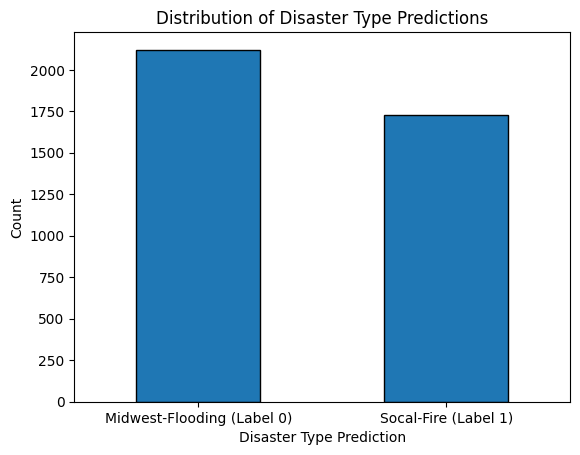

Count for Midwest-Flooding (Label 0): 2121
Count for Socal-Fire (Label 1): 1726


In [33]:
# Create dataframe with predictions
predictions_df = pd.read_csv('../data/test_images_flooding-fire_predictions.csv', header=None)

# Drop the 'pred' row using drop method and reset the index
predictions_df = predictions_df.drop(0).reset_index(drop=True)

# Count occurrences of each prediction
prediction_counts = predictions_df[0].value_counts()

# Plotting a bar plot
ax = prediction_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Disaster Type Prediction')
plt.ylabel('Count')
plt.title('Distribution of Disaster Type Predictions')
plt.xticks([0, 1], ['Midwest-Flooding (Label 0)', 'Socal-Fire (Label 1)'])
plt.xticks(rotation=0)

# Save plot to figures directory
plt.savefig(f'../figures/distribution_of_disaster_type_predictions.png')
plt.show()

# Print the count for Midwest-Flooding (Label 0)
print(f"Count for Midwest-Flooding (Label 0): {prediction_counts[0]}")
# Print the count for Socal-Fire (Label 1)
print(f"Count for Socal-Fire (Label 1): {prediction_counts[1]}")

### Perform K-Fold Cross-Validation & Classification Report

In [34]:
# Define the features and labels
features = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 'blue_mean', 
            'width','height', 'hog_features', 'num_contours', 'segment_count', 'euler_number']
X = df_filtered[features].values
y = df_filtered['disaster_type'].apply(lambda x: 0 if x == 'midwest-flooding' else 1).values

# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store evaluation metrics
accuracy_scores = []
true_labels = []
predicted_labels = []

for train_index, val_index in kf.split(X_scaled):
    # Split the data into training and validation sets
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the accuracy and append to the list
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    # Store true and predicted labels
    true_labels.extend(y_val)
    predicted_labels.extend(y_pred)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the results
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(classification_report(true_labels, predicted_labels, target_names=['Midwest Flooding', 'Socal Fire']))

Mean Accuracy: 0.9678
Standard Deviation of Accuracy: 0.0028
                  precision    recall  f1-score   support

Midwest Flooding       0.97      0.96      0.96      7004
      Socal Fire       0.96      0.98      0.97      8380

        accuracy                           0.97     15384
       macro avg       0.97      0.97      0.97     15384
    weighted avg       0.97      0.97      0.97     15384



# Task B: Damage Level Classification

TASK B: DAMAGE LEVEL CLASSIFICATION
The agency needs to know how severe a disaster is in order to allocate resources for a response effectively. The agency is especially concerned with human lives and uses building damage as an important metric for disaster severity.

Your task is to assist the agency by automatically detecting the building damage level after a disaster. Specifically, create a damage level classifier for the hurricane-matthew disaster.

To assess your performance, please submit predictions for the test_images_hurricane-matthew.npz images. This should be in a CSV file test_images_hurricane-matthew_predictions.csv consisting of a single column with no header, with a 0-3 prediction of the damage level. The prediction in row i should correspond to the ith image.

### Prep the data

In [35]:
# Filter the DataFrame for the 'hurricane-matthew' disaster type and relevant features
df_filtered_b = features_df[(features_df['disaster_type'] == 'hurricane-matthew')]
features_b = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 
              'blue_mean', 'pixel_props', 'hog_features','num_contours', 'segment_count', 
              'euler_number']
X_b = df_filtered_b[features_b].values
y_b = df_filtered_b['label'].values

In [36]:
df_filtered_b.head()

,disaster_type,sobel_features,sobel_mean,lbp_features,lbp_mean,gabor_features,gabor_mean,red_mean,green_mean,blue_mean,width,height,pixel_props,hog_features,num_contours,segment_count,euler_number,label
0,hurricane-matthew,"[[8.780424, 4.093462, 2.5983806, 4.4233723, 4....",14.569633,"[3.0, 4.0, 1.0, 9.0, 0.0, 1.0, 5.0, 2.0, 2.0, ...",4.931624,"[69.64084, 70.26716, 70.39187, 70.20955, 70.06...",81.010612,75.702278,105.275780,101.084045,54,65,4.345455,33.897690,0,222,89,3
1,hurricane-matthew,"[[6.0609307, 6.4567037, 5.8585186, 9.833767, 2...",9.584824,"[2.0, 5.0, 4.0, 2.0, 3.0, 3.0, 9.0, 2.0, 3.0, ...",4.702630,"[117.57879, 134.14302, 136.76431, 135.9622, 12...",92.084763,88.451599,119.422882,110.248329,105,67,1.535354,66.172371,0,271,7,0
2,hurricane-matthew,"[[7.8057847, 11.089824, 12.990839, 20.428656, ...",17.071079,"[2.0, 4.0, 5.0, 4.0, 0.0, 9.0, 3.0, 2.0, 9.0, ...",4.952381,"[81.89116, 86.76233, 87.61375, 91.107445, 96.1...",98.315758,111.971558,122.160713,119.043320,56,54,0.159247,25.344090,0,342,52,1
3,hurricane-matthew,"[[36.96584, 57.97566, 31.068295, 13.523826, 5....",6.611919,"[0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 1.0, ...",4.878325,"[117.33957, 114.29235, 99.00635, 90.05382, 86....",99.939568,96.979698,128.503967,127.725380,124,114,0.060523,134.007019,0,216,15,0
4,hurricane-matthew,"[[23.126709, 16.672747, 8.978999, 7.197319, 14...",16.538330,"[1.0, 0.0, 1.0, 1.0, 1.0, 3.0, 5.0, 4.0, 0.0, ...",4.397566,"[83.53239, 93.17831, 95.12369, 95.15754, 94.45...",84.787422,87.179848,108.778908,96.311356,51,58,3.825000,24.869530,0,319,12,2


### Normalize the features

In [37]:
# Normalize the feature vectors for Task B
scaler_b = StandardScaler()
X_scaled_b = scaler_b.fit_transform(X_b)

### Split the data into train/validation sets

In [38]:
# Split the data into training and validation sets for Task B
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_scaled_b, y_b, test_size=0.2, random_state=42)

### Train the model

In [39]:
# Initialize the Logistic Regression model for Task B
model_b = LogisticRegression(max_iter=13000, solver='newton-cg', multi_class='auto') # loss minimised
model_b.fit(X_train_b, y_train_b)

LogisticRegression(max_iter=13000, solver='newton-cg')

### Evaluate the model

In [40]:
# Predict on the validation set for Task B
val_predictions_b = model_b.predict(X_val_b)

# Evaluate the model's accuracy on the validation set for Task B
accuracy_b = accuracy_score(y_val_b, val_predictions_b)
print(f"Validation Accuracy for Task B: {accuracy_b}")

Validation Accuracy for Task B: 0.5571492604213357


### Run model on test images

In [41]:
# Load and extract features from the test images for Task B
test_data_b = np.load('../data/test_images_hurricane-matthew.npz')
test_images_b = [test_data_b[key] for key in test_data_b.keys()]

# Initialize a list to store the test features
test_features_b = []

# Iterate over each test image and extract features for Task B
for img_array in test_images_b:
    # Convert image to float32 for processing
    img_b = img_array.astype(np.float32)

    # Extract features
    sobel_features_b = get_sobel_features(img_b)
    sobel_mean_b = np.mean(sobel_features_b)

    lbp_features_b = get_local_binary_pattern(img_b)
    lbp_mean_b = np.mean(lbp_features_b)

    theta, sigma, frequency = 0, 1.0, 0.1
    kernel_b = generate_gabor_kernel(theta, sigma, frequency)
    gabor_features_b = get_gabor_features(img_b, kernel_b)
    gabor_mean_b = np.mean(gabor_features_b)

    red_mean_b = np.mean(img_b[:, :, 0])
    green_mean_b = np.mean(img_b[:, :, 1])
    blue_mean_b = np.mean(img_b[:, :, 2])

    pixel_props_b = calculate_black_white_ratio(img_b)

    hog_features_b = extract_hog_features(img_b, visualize=False)

    num_contours_b = extract_contour_features(img_b)

    segment_count_b = extract_segmentation_count(img_b)

    euler_number_b = extract_euler_number(img_b)

    features_dict_b = {
        'sobel_features': sobel_features_b.flatten().tolist(),
        'sobel_mean': sobel_mean_b,
        'lbp_features': lbp_features_b.flatten().tolist(),
        'lbp_mean': lbp_mean_b,
        'gabor_features': gabor_features_b.flatten().tolist(),
        'gabor_mean': gabor_mean_b,
        'red_mean': red_mean_b,
        'green_mean': green_mean_b,
        'blue_mean': blue_mean_b,
        'pixel_props': pixel_props_b,
        'hog_features': hog_features_b,
        'num_contours': num_contours_b,
        'segment_count': segment_count_b,
        'euler_number': euler_number_b
    }

    # Append the dictionary to test features list
    test_features_b.append(features_dict_b)

# Convert the list of feature dictionaries to a DataFrame
test_features_df_b = pd.DataFrame(test_features_b)
test_features_df_b.head()

,sobel_features,sobel_mean,lbp_features,lbp_mean,gabor_features,gabor_mean,red_mean,green_mean,blue_mean,pixel_props,hog_features,num_contours,segment_count,euler_number
0,"[6.029447555541992, 7.949389457702637, 7.58630...",12.173832,"[2.0, 4.0, 3.0, 2.0, 9.0, 1.0, 0.0, 1.0, 9.0, ...",4.574303,"[100.48870849609375, 108.47773742675781, 107.7...",85.853622,79.496857,111.993958,105.069336,7.427338e+00,223.687103,0,239,45
1,"[13.597861289978027, 12.701240539550781, 6.214...",10.672734,"[3.0, 1.0, 9.0, 3.0, 3.0, 2.0, 3.0, 3.0, 4.0, ...",4.503125,"[70.44113159179688, 75.83685302734375, 82.3442...",62.483528,55.897533,82.103455,76.338158,2.096111e+02,55.783478,0,243,14
2,"[4.087373733520508, 11.21638298034668, 8.24564...",12.690783,"[1.0, 2.0, 9.0, 1.0, 0.0, 2.0, 9.0, 2.0, 2.0, ...",4.431393,"[82.05473327636719, 84.63672637939453, 80.7743...",76.801857,74.891891,99.790543,86.786385,4.800000e+12,16.843475,0,204,9
3,"[6.16587495803833, 9.815851211547852, 5.530812...",17.129171,"[2.0, 1.0, 0.0, 9.0, 5.0, 9.0, 9.0, 0.0, 9.0, ...",4.686973,"[71.7766342163086, 71.83255767822266, 72.21846...",98.349991,95.980461,127.406898,114.698082,4.150000e+00,16.950968,0,281,23
4,"[8.798677444458008, 4.226040840148926, 13.1456...",8.861421,"[3.0, 1.0, 4.0, 5.0, 2.0, 0.0, 5.0, 9.0, 0.0, ...",4.686264,"[91.6003646850586, 98.62165069580078, 97.15644...",78.190468,72.934441,102.167534,92.432625,1.331579e+01,25.354383,0,256,26


In [42]:
# Select the same features used for training
features_b = ['sobel_mean', 'lbp_mean', 'gabor_mean', 'red_mean', 'green_mean', 
              'blue_mean', 'pixel_props', 'hog_features', 'num_contours', 'segment_count', 
              'euler_number']
X_test_b = test_features_df_b[features_b].values

# Normalize the features using the pre-fitted StandardScaler
X_test_normalized_b = scaler_b.transform(X_test_b)

# Predict using the trained model
test_predictions_b = model_b.predict(X_test_normalized_b)

# Save the predictions to a CSV file
output_file_path_b = "../data/test_images_hurricane-matthew_predictions.csv"
predictions_df_b = pd.DataFrame(test_predictions_b, columns=['pred'])
predictions_df_b.to_csv(output_file_path_b, index=False)
print(f"Predictions for Task B saved to: {output_file_path_b}")

Predictions for Task B saved to: ../data/test_images_hurricane-matthew_predictions.csv


### Plot results of damage level classifications

In [43]:
# Check the number of images in test data
num_images_b = len(test_data_b.files)
print("Number of images:", num_images_b)

Number of images: 2788


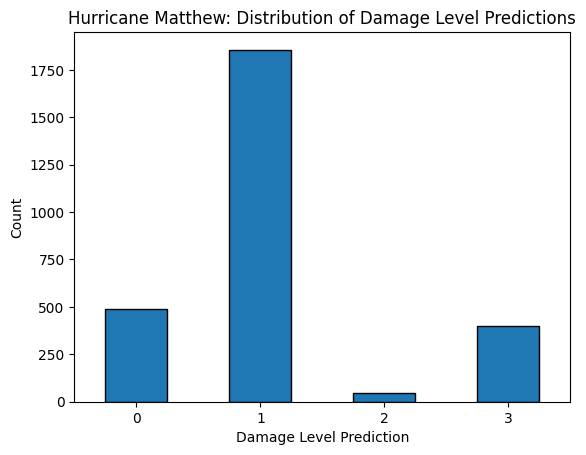

Count for Damage Level 0: 491
Count for Damage Level 1: 1856
Count for Damage Level 2: 44
Count for Damage Level 3: 397


In [44]:
# Plot Distribution of Damage Level Predictions
predictions_df = pd.read_csv('../data/test_images_hurricane-matthew_predictions.csv', header=None)

# Drop the 'pred' row using drop method and reset the index
predictions_df = predictions_df.drop(0).reset_index(drop=True)

# Count occurrences of each prediction and sort index
prediction_counts = predictions_df[0].value_counts().sort_index()

# Bar plot of predictions
prediction_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Damage Level Prediction')
plt.ylabel('Count')
plt.title('Hurricane Matthew: Distribution of Damage Level Predictions')
plt.xticks(ticks=range(len(prediction_counts)), labels=prediction_counts.index, rotation=0)

# Save plot to figures directory
plt.savefig(f'../figures/distribution_of_damage_level_predictions.png')
plt.show()

# Print the count for each damage level prediction
for damage_level in prediction_counts.index:
    print(f"Count for Damage Level {damage_level}: {prediction_counts[damage_level]}")

### Perform K-Fold Cross Validation & Classification Report

In [45]:
# Prepare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store evaluation metrics
accuracy_scores = []
true_labels = []
predicted_labels = []

for train_index, val_index in kf.split(X_scaled_b):
    # Split the data into training and validation sets
    X_train_b, X_val_b = X_scaled_b[train_index], X_scaled_b[val_index]
    y_train_b, y_val_b = y_b[train_index], y_b[val_index]
    
    # Train the model on the training set
    model.fit(X_train_b, y_train_b)
    
    # Predict on the validation set
    y_pred_b = model.predict(X_val_b)
    
    # Calculate the accuracy and append to the list
    accuracy = accuracy_score(y_val_b, y_pred_b)
    accuracy_scores.append(accuracy)

    # Store true and predicted labels
    true_labels.extend(y_val_b)
    predicted_labels.extend(y_pred_b)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the results
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(classification_report(true_labels, predicted_labels, target_names=['Class 0', 
                                                                         'Class 1', 
                                                                         'Class 2', 
                                                                         'Class 3']))

Mean Accuracy: 0.5662
Standard Deviation of Accuracy: 0.0092
              precision    recall  f1-score   support

     Class 0       0.51      0.34      0.41      2631
     Class 1       0.59      0.84      0.70      5236
     Class 2       0.27      0.03      0.06      1544
     Class 3       0.54      0.56      0.55      1740

    accuracy                           0.57     11151
   macro avg       0.48      0.44      0.43     11151
weighted avg       0.52      0.57      0.52     11151



## Result Analysis

### Correlation Matrix

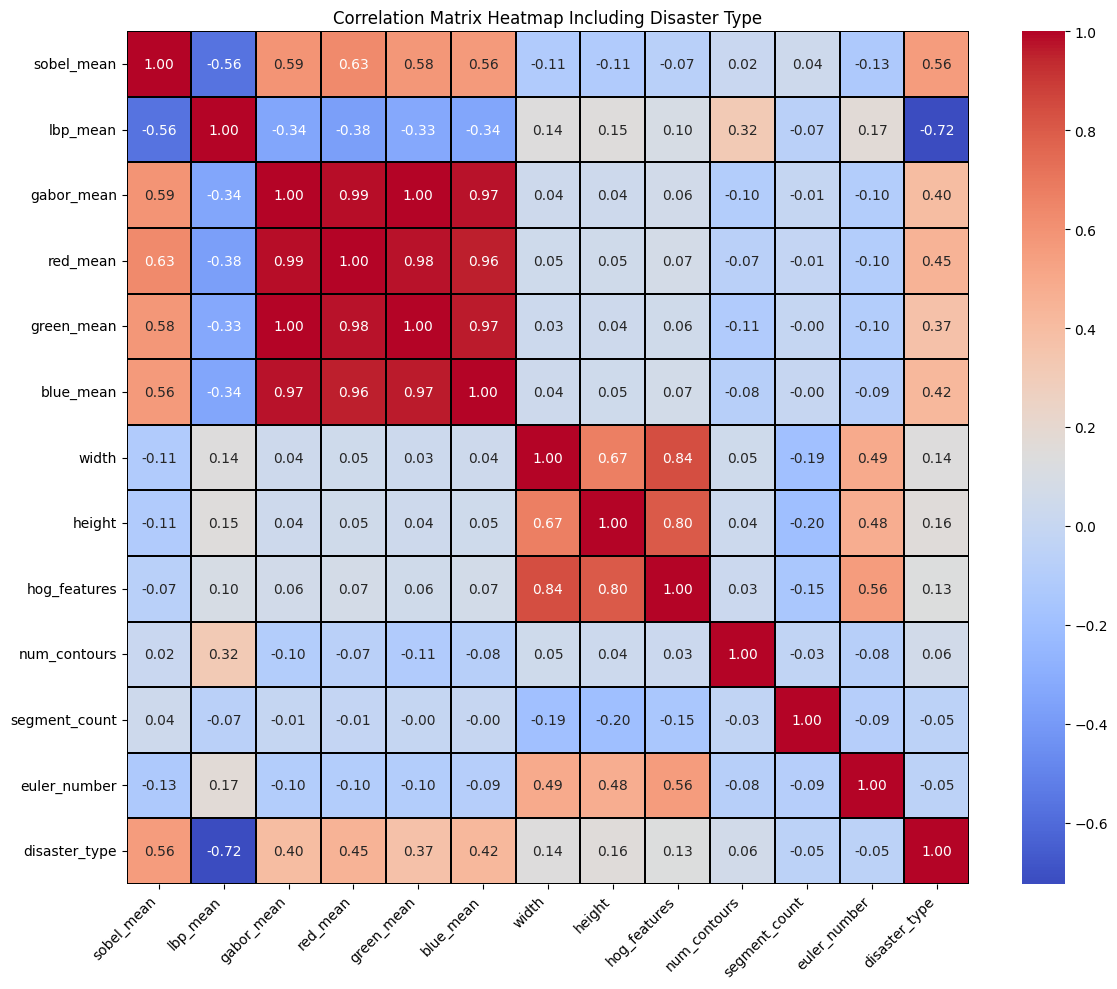

In [46]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df['disaster_type'] = y

# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.1, linecolor='black')

# Plot results
plt.title('Correlation Matrix Heatmap Including Disaster Type')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save plot to figures directory
plt.savefig(f'../figures/correlation_matrix_heatmap_including_disaster_type.png')
plt.show()

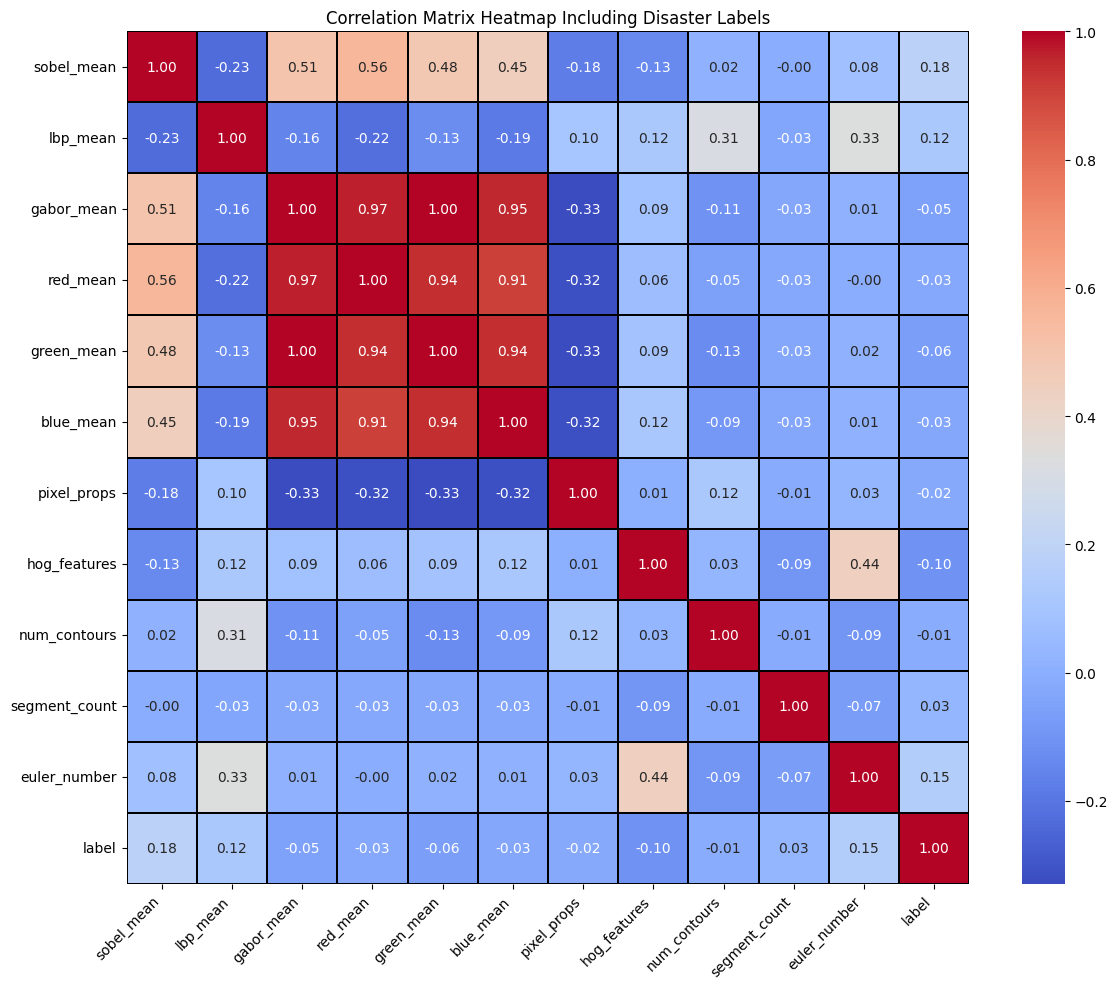

In [47]:
X_scaled_df_b = pd.DataFrame(X_scaled_b, columns=features_b)
X_scaled_df_b['label'] = y_b 

# Calculate the correlation matrix df_filtered_b
correlation_matrix_b = X_scaled_df_b.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_b, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.1, linecolor='black')

# Plot results
plt.title('Correlation Matrix Heatmap Including Disaster Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save plot to figures directory
plt.savefig(f'../figures/correlation_matrix_heatmap_including_disaster_labels.png')
plt.show()